# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city
    print(city_url)
    
    # # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

    #     # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=howrah
Processing Record 1 of Set 1 | howrah
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=grytviken
Processing Record 2 of Set 1 | grytviken
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=qamdo
Processing Record 3 of Set 1 | qamdo
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=harstad
Processing Record 4 of Set 1 | harstad
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=jamestown
Processing Record 5 of Set 1 | jamestown
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=wailua homesteads
Processing Record 6 of Set 1 | wailua homesteads
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=iqaluit
Proce

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howrah,22.5892,88.3103,299.15,65,40,0.00,IN,1712868248
1,grytviken,-54.2811,-36.5092,272.16,71,15,4.75,GS,1712867770
2,qamdo,31.1667,97.2333,271.29,57,44,2.06,CN,1712868002
3,harstad,68.7990,16.5293,275.81,97,99,12.96,NO,1712868030
4,jamestown,42.0970,-79.2353,291.92,96,100,5.66,US,1712867895


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howrah,22.5892,88.3103,299.15,65,40,0.00,IN,1712868248
1,grytviken,-54.2811,-36.5092,272.16,71,15,4.75,GS,1712867770
2,qamdo,31.1667,97.2333,271.29,57,44,2.06,CN,1712868002
3,harstad,68.7990,16.5293,275.81,97,99,12.96,NO,1712868030
4,jamestown,42.0970,-79.2353,291.92,96,100,5.66,US,1712867895


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

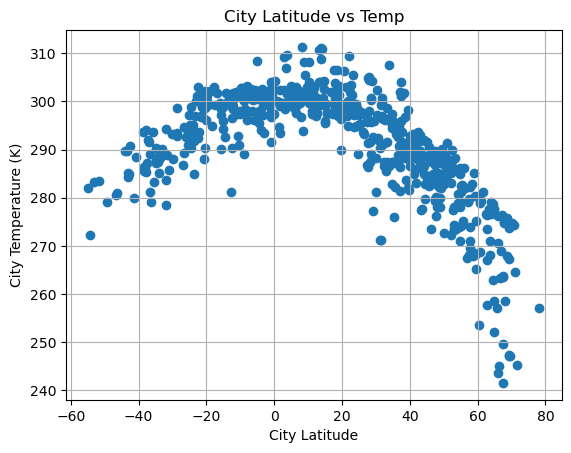

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Temp")
plt.ylabel ("City Temperature (K)")
plt.xlabel ("City Latitude")
plt.grid(True) 
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

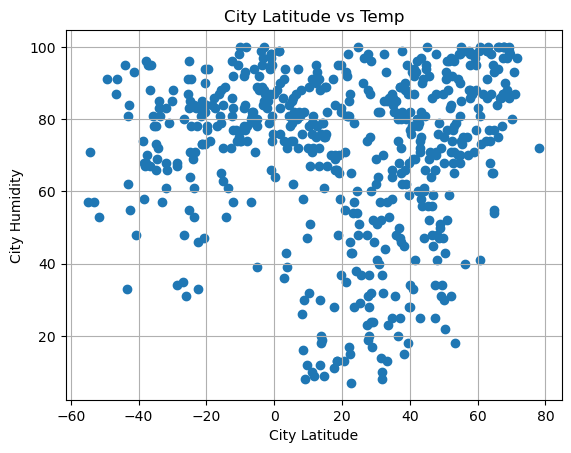

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Temp")
plt.ylabel ("City Humidity")
plt.xlabel ("City Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

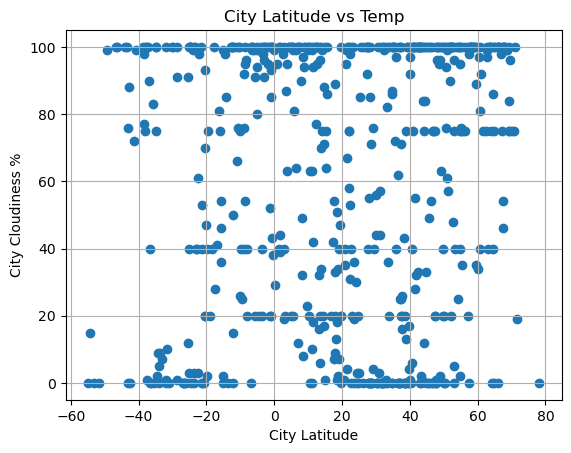

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Temp")
plt.ylabel ("City Cloudiness %")
plt.xlabel ("City Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

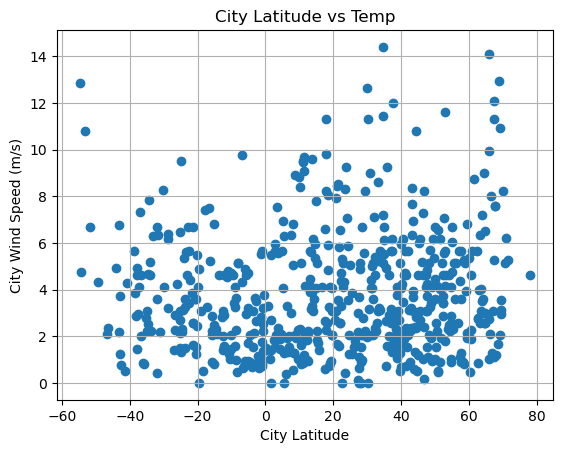

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Temp")
plt.ylabel ("City Wind Speed (m/s)")
plt.xlabel ("City Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


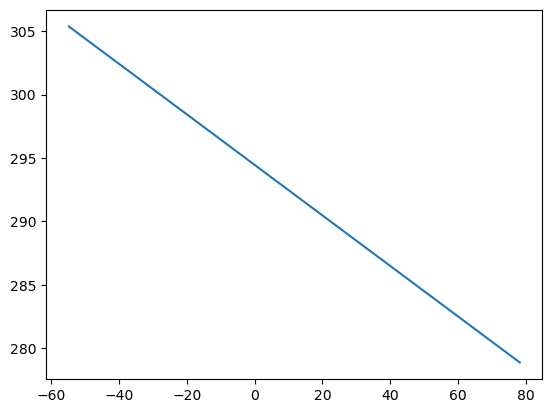

In [46]:
# Define a function to create Linear Regression plots
def linear_regression_plots (x,y,header,coordinates):

    city_data_df = city_data_df.sort_values('Lat')
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'],city_data_df['Max Temp'])
line_pt = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], line_pt)
line_eq = f"t={slope:.2f}*lat = {intercept:.2f}"
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
544,mbandaka,0.0487,18.2603,297.28,87,99,1.50,CD,1712868947
470,rosa zarate,0.3333,-79.4667,304.33,64,29,1.41,EC,1712868863
295,tanjung pinang,0.9167,104.4500,300.17,88,95,3.31,ID,1712868644
219,evinayong,1.4368,10.5512,294.61,99,100,1.03,GQ,1712868567
116,kuching,1.5500,110.3333,299.87,99,40,0.00,MY,1712868447


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df)["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
98,ushuaia,-54.8000,-68.3000,281.96,57,0,12.86,AR,1712867754
1,grytviken,-54.2811,-36.5092,272.16,71,15,4.75,GS,1712867770
93,punta arenas,-53.1500,-70.9167,283.21,57,0,10.80,CL,1712868142
57,puerto natales,-51.7236,-72.4875,283.40,53,0,6.69,CL,1712867765
16,port-aux-francais,-49.3500,70.2167,279.00,91,99,4.31,TF,1712867893


###  Temperature vs. Latitude Linear Regression Plot

In [52]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
linear_regression_plots(x,y,'Max Temp',(6,30))


UnboundLocalError: cannot access local variable 'city_data_df' where it is not associated with a value

The r-value is: 0.4121057168607245


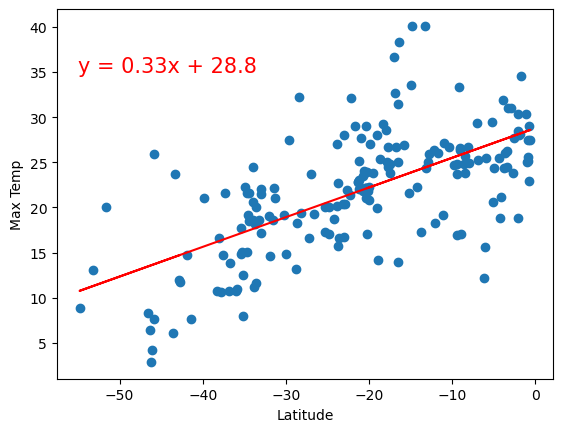

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


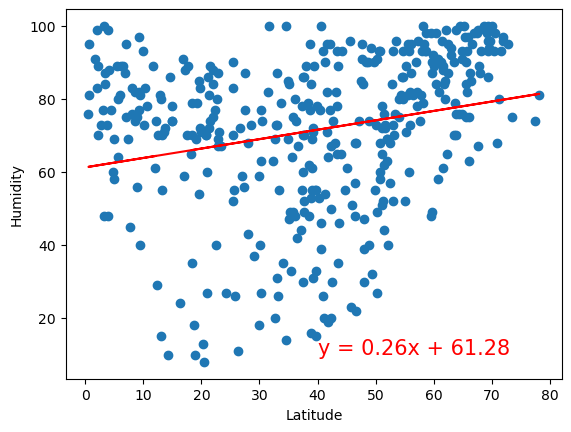

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


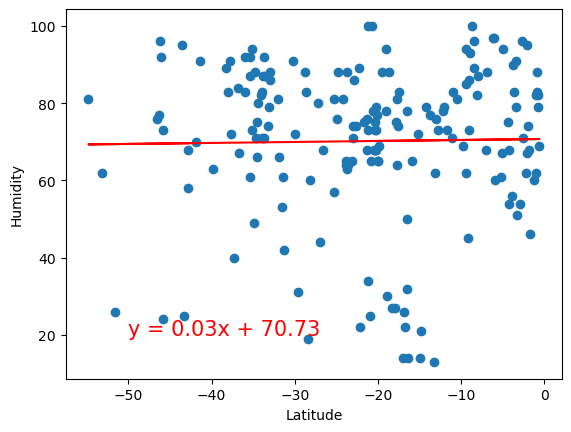

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


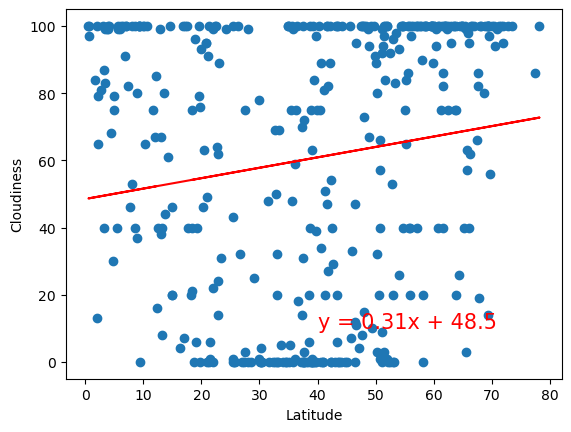

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


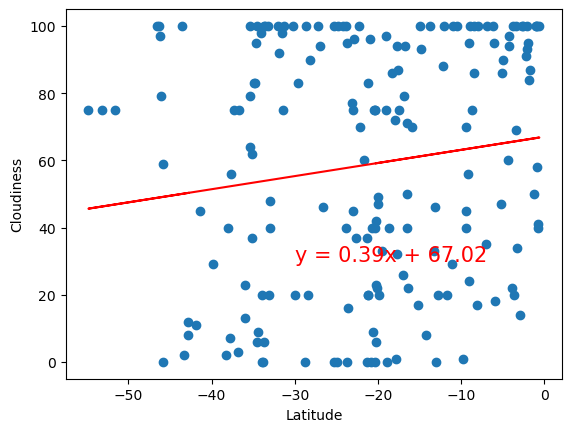

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


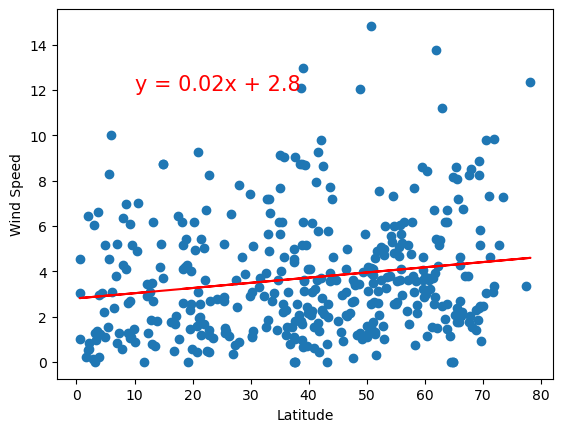

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


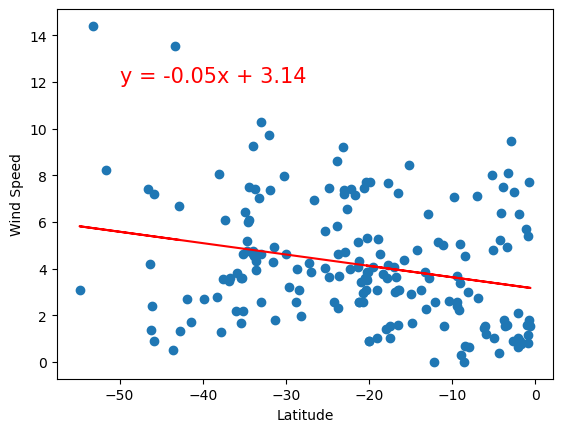

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE